In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn

plt.style.use('classic')

In [15]:
from sklearn.datasets import load_iris
data = load_iris()

In [21]:
X = data.data
y = data.target

print("X data shape : ", data.data.shape)
print("y data shape : ", data.target.shape)
print("\nX data type : ", X.dtype)
print("y data type : ", y.dtype)

X data shape :  (150, 4)
y data shape :  (150,)

X data type :  float64
y data type :  int32


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [25]:
data_df = pd.DataFrame(X_train, columns=data.feature_names)
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


In [28]:
# feature data(train) 의 간단한 통계적 특징을 보여준다.
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),112.0,5.886607,0.871314,4.3,5.100,5.80,6.5,7.9
sepal width (cm),112.0,3.051786,0.436196,2.0,2.800,3.00,3.3,4.4
petal length (cm),112.0,3.796429,1.800697,1.1,1.575,4.25,5.2,6.9
petal width (cm),112.0,1.223214,0.781427,0.1,0.300,1.30,1.9,2.5


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

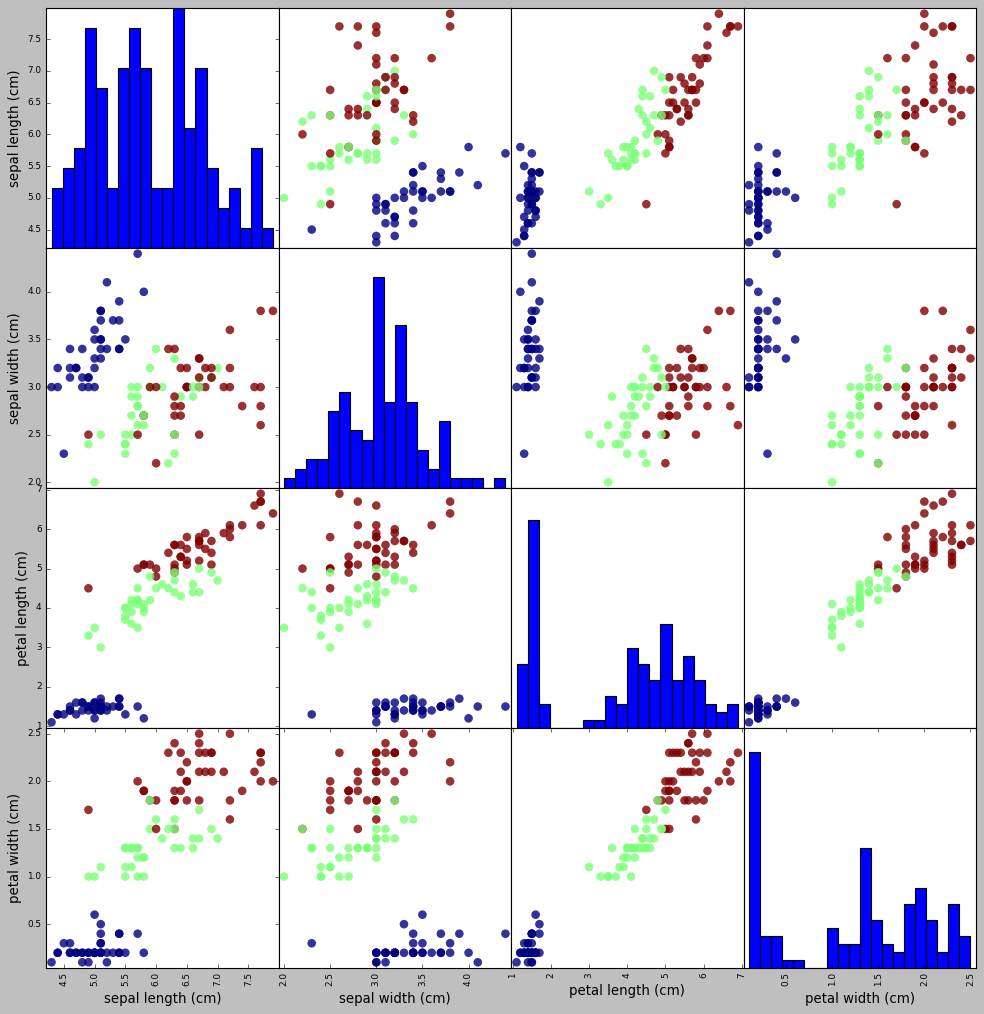

In [34]:
# feature 간의 상관관계를 보여준다.
# 몇몇 feature 간에 상관관계가 있음을 알 수 있다.
# target이 feature 의 데이터에 따라 잘 분리되는 것을 알 수 있다.
# M_ij 는 M_ji 와 y=x 대칭 관계로 동일하다.

pd.plotting.scatter_matrix(data_df, c = y_train, figsize = (15,15), marker = 'o', hist_kwds={'bins':20},
                           s=60, alpha = 0.8)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

print(f"train score : {knn.score(X_train, y_train):0.4f}")
print(f"test score : {knn.score(X_test, y_test):0.4f}")

train score : 1.0000
test score : 0.9737


In [39]:
X_new = [[5,2.9,1,0.2]]
predicted_idx = knn.predict(X_new)
print("predicted_target : ", data.target_names[predicted_idx])

predicted_target :  ['setosa']
